In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re

In [2]:
def plot_seconds_for_batch_size(trainer):
    nodes = [1, 2, 4, 8, 12]
    batch_size = [480, 960, 1440]
    
    seconds = np.zeros((len(batch_size), len(nodes)))
    
    regex = re.compile(r'0: Memory Usage: \d+\.\d+, Training Duration: (\d+\.\d+)')

    for result in results:
        config = result['config']
        if config['trainer'] == trainer and config['slots'] == 1:
            seconds[batch_size.index(config['parameters']['--batch-size']), nodes.index(config['hosts']), ] += float(regex.search(result['stderr']).group(1))

    fig, ax = plt.subplots()
    im = ax.imshow(seconds, origin='lower')
    plt.set_cmap('autumn_r')


    ax.set_yticks(np.arange(len(batch_size)))
    ax.set_xticks(np.arange(len(nodes)))

    ax.set_yticklabels(batch_size)
    ax.set_xticklabels(nodes)
    
    ax.set_ylabel('# of batch_size')
    ax.set_xlabel('# of nodes')

    for i in range(len(batch_size)):
        for j in range(len(nodes)):
            text = ax.text(
                j, 
                i, 
                f'{seconds[i, j]:.1f}',
                ha="center", 
                va="center", 
                color="black"
            )

    ax.set_title(f'Training time ({trainer})')
    fig.tight_layout()
    plt.show()
    fig.savefig(f'training_time_{trainer}.png')

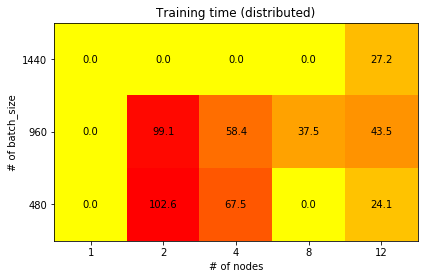

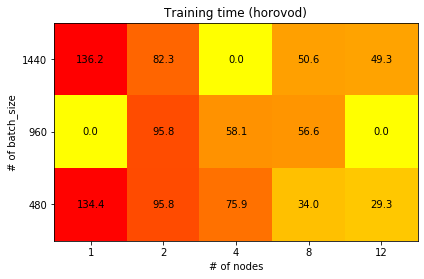

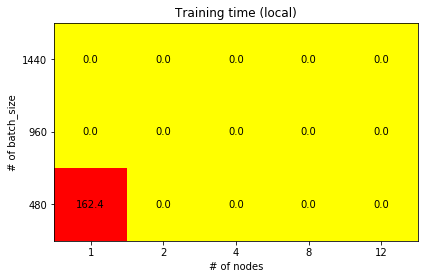

In [8]:
with open('results.json') as f:
    results = json.load(f)['results']
plot_seconds_for_batch_size('distributed')
plot_seconds_for_batch_size('horovod')
plot_seconds_for_batch_size('local')

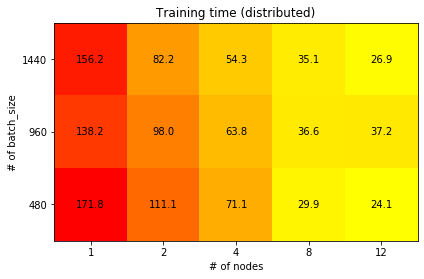

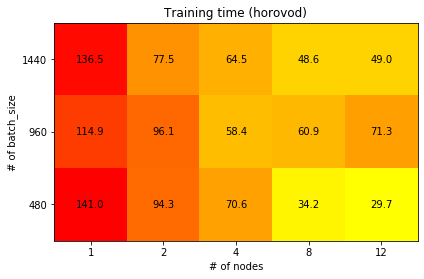

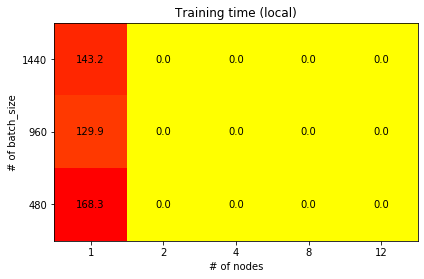

In [7]:
with open('results_202007141530.json') as f:
    results = json.load(f)['results']
plot_seconds_for_batch_size('distributed')
plot_seconds_for_batch_size('horovod')
plot_seconds_for_batch_size('local')